## 1. Descriptive Stats

In [3]:
import pandas as pd
df = pd.read_csv(r"c:\Users\lenovo\Documents\MS documents\RA work\16-31 July\Formula1_2024season_sprintResults.csv")

summary = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "sample_data": df.head(5)
}

print(summary)

{'shape': (120, 9), 'columns': ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points'], 'sample_data':    Track Position  No           Driver                        Team  \
0  China        1   1   Max Verstappen  Red Bull Racing Honda RBPT   
1  China        2  44   Lewis Hamilton                    Mercedes   
2  China        3  11     Sergio Perez  Red Bull Racing Honda RBPT   
3  China        4  16  Charles Leclerc                     Ferrari   
4  China        5  55     Carlos Sainz                     Ferrari   

   Starting Grid  Laps Time/Retired  Points  
0              4    19    32:04.660       8  
1              2    19      +13.043       7  
2              6    19      +15.258       6  
3              7    19      +17.486       5  
4              5    19      +20.696       4  }


## 2. Recreated visuals

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19400\2997384939.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, "Improvement"] = df_clean["Starting Grid"] - df_clean["Position"]


Correlation between Improvement (gaining positions) and Points: 0.04
Correlation between Starting Grid and Points: -0.81


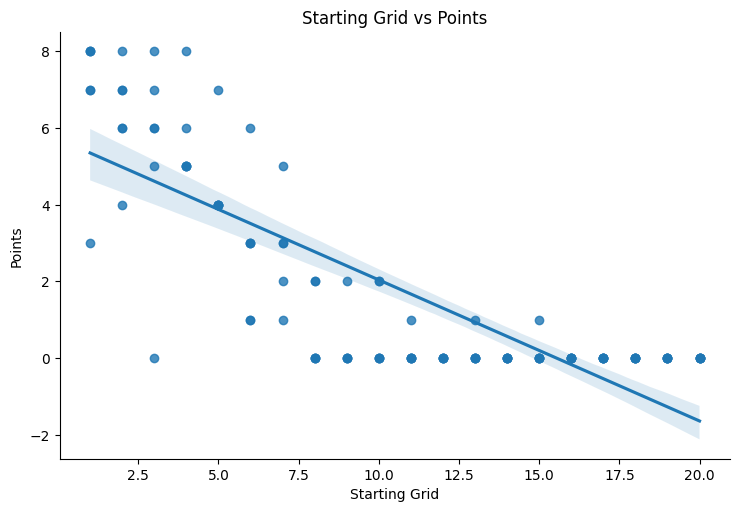

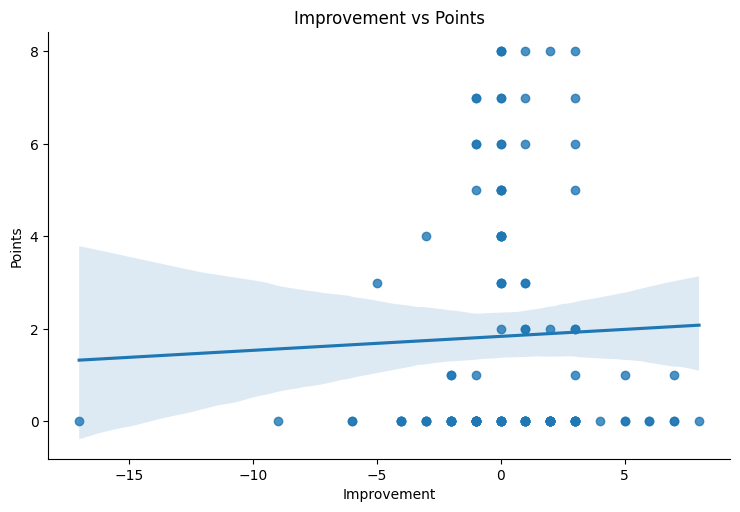

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Position"] = pd.to_numeric(df["Position"], errors="coerce")
df["Points"] = pd.to_numeric(df["Points"], errors="coerce")

# Dropping rows with NaNs in key columns
df_clean = df.dropna(subset=["Starting Grid", "Position", "Points"])

# Creating improvement metric (positions gained)
df_clean.loc[:, "Improvement"] = df_clean["Starting Grid"] - df_clean["Position"]

# 1. Correlation between Improvement and Points
improvement_vs_points_corr = df_clean["Improvement"].corr(df_clean["Points"])

# 2. Correlation between Starting Grid and Points
start_vs_points_corr = df_clean["Starting Grid"].corr(df_clean["Points"])

print(f"Correlation between Improvement (gaining positions) and Points: {improvement_vs_points_corr:.2f}")
print(f"Correlation between Starting Grid and Points: {start_vs_points_corr:.2f}")

# Plotting relationships
sns.lmplot(data=df_clean, x="Starting Grid", y="Points", aspect=1.5)
plt.title("Starting Grid vs Points")
plt.show()

sns.lmplot(data=df_clean, x="Improvement", y="Points", aspect=1.5)
plt.title("Improvement vs Points")
plt.show()
